In [1]:
import sqlite3

conn = sqlite3.connect("sales_data.db")
cursor = conn.cursor()

cursor.execute("""
CREATE TABLE products (
    id INTEGER PRIMARY KEY,
    name TEXT,
    category TEXT
)
""")

cursor.execute("""
CREATE TABLE sales (
    id INTEGER PRIMARY KEY,
    product_id INTEGER,
    quantity INTEGER,
    price REAL,
    sale_date TEXT,
    FOREIGN KEY(product_id) REFERENCES products(id)
)
""")

products = [
    (1, 'Apple', 'Fruit'),
    (2, 'Banana', 'Fruit'),
    (3, 'Carrot', 'Vegetable'),
    (4, 'Detergent', 'Cleaning'),
    (5, 'Eggplant', 'Vegetable')
]
cursor.executemany("INSERT INTO products VALUES (?, ?, ?)", products)

sales = [
    (1, 10, 0.5, '2024-01-05'),
    (1, 5, 0.5, '2024-02-10'),
    (2, 20, 0.2, '2024-01-20'),
    (3, 15, 0.3, '2024-01-25'),
    (4, 3, 2.5, '2024-01-28'),
    (5, 7, 1.2, '2024-01-29'),
    (3, 10, 0.3, '2024-02-01'),
    (4, 2, 2.5, '2024-02-02'),
]

cursor.executemany("INSERT INTO sales (product_id, quantity, price, sale_date) VALUES (?, ?, ?, ?)", sales)

conn.commit()
conn.close()

Revenue by Category:
    category  revenue
0   Cleaning     12.5
1      Fruit     11.5
2  Vegetable     15.9

Top 3 Products in Jan 2024 by Revenue:
     product  revenue
0   Eggplant      8.4
1  Detergent      7.5
2      Apple      5.0


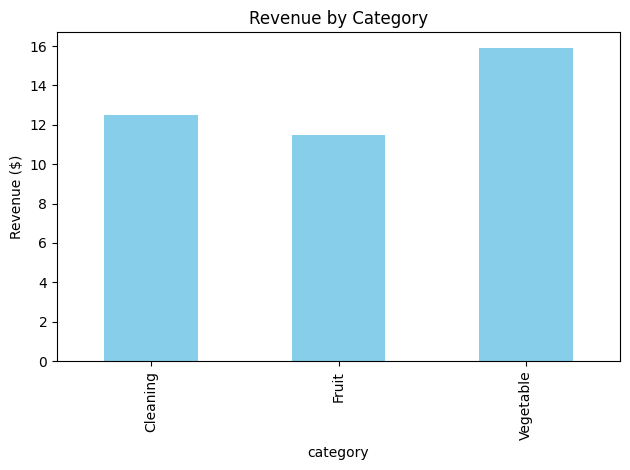

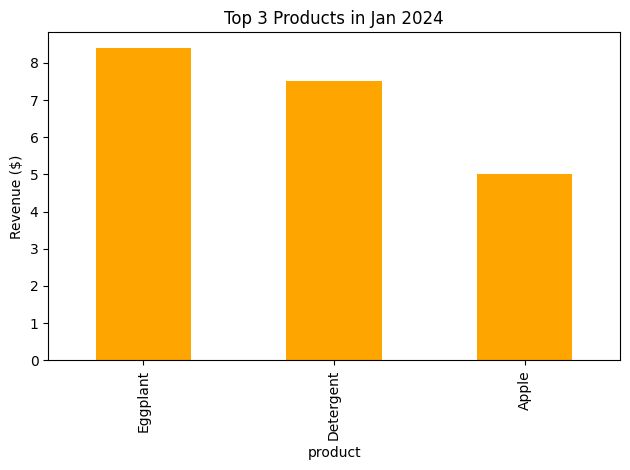

In [2]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to database
conn = sqlite3.connect("sales_data.db")

# 1. Revenue per Category
query1 = """
SELECT p.category, SUM(s.quantity * s.price) AS revenue
FROM sales s
JOIN products p ON s.product_id = p.id
GROUP BY p.category
"""

df_category = pd.read_sql_query(query1, conn)
print("Revenue by Category:")
print(df_category)

# 2. Top 3 Products by Revenue (January 2024 only)
query2 = """
SELECT p.name AS product, SUM(s.quantity * s.price) AS revenue
FROM sales s
JOIN products p ON s.product_id = p.id
WHERE strftime('%Y-%m', s.sale_date) = '2024-01'
GROUP BY s.product_id
ORDER BY revenue DESC
LIMIT 3
"""

df_top_products = pd.read_sql_query(query2, conn)
print("\nTop 3 Products in Jan 2024 by Revenue:")
print(df_top_products)

conn.close()

# Plot 1: Revenue by Category
df_category.plot(kind='bar', x='category', y='revenue', legend=False, color='skyblue')
plt.title('Revenue by Category')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig("category_revenue.png")
plt.show()

# Plot 2: Top 3 Products in Jan 2024
df_top_products.plot(kind='bar', x='product', y='revenue', legend=False, color='orange')
plt.title('Top 3 Products in Jan 2024')
plt.ylabel('Revenue ($)')
plt.tight_layout()
plt.savefig("top_products_jan2024.png")
plt.show()
